(40000, 784) (10000, 784)
(40000, 10) (10000, 10)
This Digit is a: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


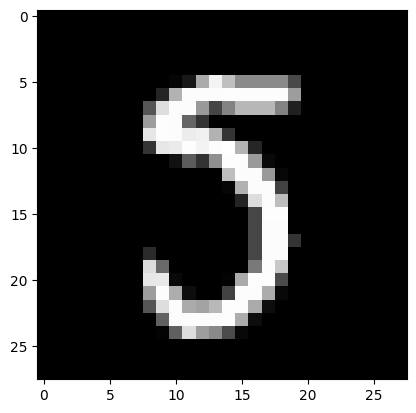

In [86]:
import numpy as np
import os
import matplotlib.pyplot as plt

image_size = 28

# Load data
train = np.load(os.getcwd()+'/mnist_train.npy', allow_pickle=True)
test = np.load(os.getcwd()+'/mnist_test.npy', allow_pickle=True)

train_data = train[()]['data']
train_labels = train[()]['labels']

test_data = test[()]['data']
test_labels = test[()]['labels']

# Print dataset dimensions
print(train_data.shape,  test_data.shape)
print(train_labels.shape,  test_labels.shape)


# Show the 1st digit image from dataset and print its label
# ======== YOUR CODE HERE ========

print("This Digit is a:", train_labels[0])
plt.imshow(train_data[0].reshape(image_size, image_size), cmap='gray')
# ================================

In [87]:
def sigmoid(z):
# ======== YOUR CODE HERE ========
    return 1/(1+np.exp(-1*z))

# ================================

def grad_log(theta, X, y):
    m = X.shape[0]
# ======== YOUR CODE HERE ========
    temp = sigmoid(theta @ X.T)
    temp  = (temp - y.T) @  X
    return temp
# ================================

def cost_log(theta, X, y):
    m = X.shape[0]
# ======== YOUR CODE HERE ========
    cost = 0
    
    temp =sigmoid(theta @ X.T)
    # print(y.shape)
    cost = np.sum(np.log(temp) * y.T + np.log(1-temp) * (1-y).T)

    return -1/m *cost
# ================================

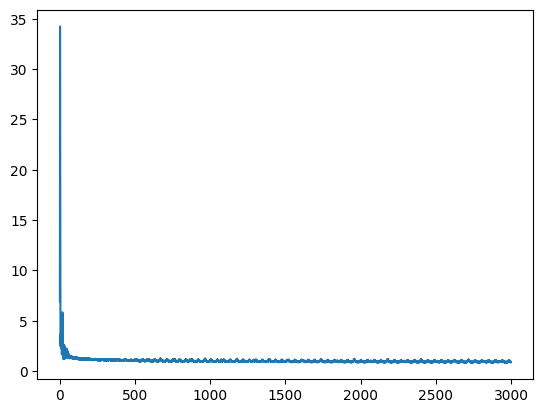

In [88]:
#Train Classifier
num_iter = 3000
alpha = 1*10**(-9)
numclasses = 10

# Add a column of ones to train_data
ones = np.ones((train_data.shape[0],1))
train_data = np.hstack((ones, train_data))

# Add a column of ones to test_data
ones = np.ones((test_data.shape[0],1))
test_data = np.hstack((ones, test_data))

# Initialize parameters
init_theta = np.zeros((numclasses, train_data.shape[1]))

# ======== YOUR CODE HERE ========
optTheta = np.copy(init_theta)
costs = np.zeros(num_iter)
for i in range(num_iter):
    costs[i] = cost_log(optTheta, train_data,train_labels)
    optTheta = optTheta - alpha* grad_log(optTheta,train_data,train_labels)
# ================================
plt.plot(np.arange(num_iter), costs)

In [92]:
np.savetxt('theta_log.csv', optTheta, delimiter=',')
print(optTheta.shape)

(10, 785)


In [91]:
def test_classifier(optTheta, X, y):
    def squared_error(a,b):
        return (a-b)**2
    def conf_matrix(y, y_hat, num_classes):
        m = np.zeros((num_classes, num_classes))
        for i in range(len(y)):
            m[int(y[i]), int(y_hat[i])] += 1.0

        for i in range(m.shape[0]):
            m[i,:] = 1./np.sum(m[i,:]) * m[i,:]
        return m
    def accuracy(y, y_hat):
        acc = 0.0
        for i in range(y.shape[0]):
            if y[i] == y_hat[i]:
                acc += 1.0
        return 1./float(y.shape[0]) * acc

# Get one hot vector estimates for the trained linear classifier
    y_hat = sigmoid(optTheta @ X.T)

#argmax over number of classes
    y_labels = np.argmax(y.T, axis=0)
#argmin over number of classes (smallest error is the chosen label)
    y_hat_labels = np.argmin(squared_error(y_hat, np.ones(y_hat.shape)), axis=0)
    return accuracy(y_labels, y_hat_labels), conf_matrix(y_labels, y_hat_labels, 10)


# ones = np.ones((train_data.shape[0],1))
# X = np.hstack((ones, train_data))
X = train_data
# Use your trained optTheta and evaluate with training data
train_acc, train_conf = test_classifier(optTheta, X, train_labels)

# ones = np.ones((test_data.shape[0],1))
# X = np.hstack((ones, test_data))
X = test_data
# Use your trained optTheta and evaluate with training data
test_acc, test_conf = test_classifier(optTheta, X, test_labels)

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

print("Training Set Accuracy: " + str(train_acc))
print("Training Set Confusion Matrix")
print(train_conf)

print("Testing Set Accuracy: " + str(test_acc))
print("Testing Set Confusion Matrix")
print(test_conf)

Training Set Accuracy: 0.8936000000000001
Training Set Confusion Matrix
[[0.977 0.    0.002 0.002 0.002 0.009 0.007 0.    0.001 0.   ]
 [0.    0.976 0.006 0.003 0.001 0.007 0.001 0.002 0.004 0.   ]
 [0.007 0.01  0.908 0.019 0.012 0.007 0.011 0.011 0.013 0.002]
 [0.004 0.004 0.027 0.897 0.001 0.041 0.005 0.009 0.004 0.008]
 [0.003 0.003 0.007 0.002 0.943 0.004 0.007 0.004 0.003 0.025]
 [0.011 0.003 0.006 0.029 0.011 0.907 0.013 0.002 0.011 0.007]
 [0.005 0.003 0.005 0.001 0.004 0.022 0.958 0.    0.002 0.   ]
 [0.003 0.004 0.012 0.003 0.01  0.003 0.001 0.947 0.001 0.017]
 [0.018 0.041 0.042 0.085 0.022 0.164 0.013 0.011 0.591 0.015]
 [0.01  0.005 0.006 0.026 0.055 0.019 0.    0.047 0.001 0.831]]
Testing Set Accuracy: 0.8879
Testing Set Confusion Matrix
[[0.98  0.    0.    0.002 0.    0.005 0.008 0.002 0.002 0.001]
 [0.    0.983 0.003 0.003 0.    0.003 0.004 0.001 0.004 0.001]
 [0.007 0.012 0.904 0.023 0.009 0.005 0.012 0.01  0.016 0.003]
 [0.003 0.    0.022 0.912 0.001 0.04  0.003 0.011 